In [2]:
import sys
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import xarray as xr
import bokeh
import holoviews as hv
from holoviews import opts, dim
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
import datashader as ds
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import geopandas as gpd
from geocube.api.core import make_geocube
import hvplot.pandas  # noqa
import hvplot.xarray  # noqa
import cartopy.crs as ccrs
import geoviews as gv
import colorcet as cc
import geopy.distance as dist
from meteostat import Stations, Daily
import sqlalchemy as db
import geoalchemy2
from sqlalchemy.orm import sessionmaker
import netCDF4 as nc
import ipywidgets as wgts
import ipyleaflet
from rastertodataframe import raster_to_dataframe
import zipfile
from datetime import datetime, date, timedelta
from dateutil.relativedelta import *
from dateutil.parser import parse
from pyproj import Proj, CRS
import geopy
import warnings
from IPython.display import display, HTML, Image
import seaborn as sns

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
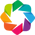

In [3]:
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline
%config Completer.use_jedi = False
warnings.filterwarnings('ignore')
hv.extension('bokeh')
# sns.set(rc={'figure.figsize':(24,12)})
# figure size in inches
rcParams['figure.figsize'] = 24,12

# Grouping by Date and Country

In [4]:
df = pd.read_csv('scouting/mozambia.csv')

In [5]:
df.drop(columns='geometry',inplace=True)

In [6]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

In [7]:
gdf.date.min(), gdf.date.max()

('2022-04-01', '2022-06-30')

In [8]:
df_grp_date = gdf.groupby([df['date']])
df_grp_cntry = gdf.groupby(by='country')

In [9]:
gdf_for_plotting = gdf.copy()

In [10]:
gdf_for_plotting

Unnamed: 0     country        lat        lon     id          sub_region  \
0           424  Mozambique -19.299744  33.248986  62861  Sub-Saharan Africa   
1           425  Mozambique -15.637863  34.396655  57779  Sub-Saharan Africa   
2           426  Mozambique -22.194675  35.052885  70433  Sub-Saharan Africa   
3           427  Mozambique -16.097872  35.767470  70459  Sub-Saharan Africa   
4           428  Mozambique -14.940438  37.522430  59775  Sub-Saharan Africa   
..          ...         ...        ...        ...    ...                 ...   
662        1256      Zambia -15.529634  28.490958  71863  Sub-Saharan Africa   
663        1257      Zambia -16.808090  26.987046  71097  Sub-Saharan Africa   
664        1258      Zambia -10.251993  33.368077  71063  Sub-Saharan Africa   
665        1259      Zambia -14.440750  28.446371  70767  Sub-Saharan Africa   
666        1260      Zambia -11.843895  31.412793  72089  Sub-Saharan Africa   

     region                     village                  district  \
0    Africa                  nhambaba 3                    Manica   
1    Africa             Missama Moatize                      Tete   
2    Africa                     Mulungo        Inhambane Province   
3    Africa                     Paquete         Zambezia Province   
4    Africa                    canhunha                   Nampula   
..      ...                         ...                       ...   
662  Africa    Chongwe, Kanakantampa, J           Lusaka Province   
663  Africa    choma,central A,kabanana         Southern Province   
664  Africa                     Mafinga         Muchinga Province   
665  Africa     Luano, Mboroma, Chipili  Central Province, Zambia   
666  Africa  Mpika,Mpika main,Chitulika         Muchinga Province   

     number_scouting  scouting_plants_checked  scouting_plants_faw  \
0                  1                       50                 27.0   
1                  1                       50                  4.0   
2                  1                       50                 34.0   
3                  1                       50                 25.0   
4                  1                       50                 16.0   
..               ...                      ...                  ...   
662                1                       50                 46.0   
663                1                       50                 12.0   
664                1                       50                 18.0   
665                1                       50                 35.0   
666                1                       50                 16.0   

     hecatres_checked        date  perc_numeric  presence  \
0                3.00  2022-04-06          0.54         1   
1                2.00  2022-04-02          0.08         0   
2                1.00  2022-05-11          0.68         1   
3                0.25  2022-05-13          0.50         1   
4                2.00  2022-04-05          0.32         1   
..                ...         ...           ...       ...   
662              0.11  2022-06-16          0.92         1   
663              1.00  2022-06-22          0.24         1   
664              0.05  2022-06-22          0.36         1   
665              2.00  2022-06-09          0.70         1   
666              1.00  2022-06-15          0.32         1   

                       geometry  
0    POINT (33.24899 -19.29974)  
1    POINT (34.39666 -15.63786)  
2    POINT (35.05289 -22.19468)  
3    POINT (35.76747 -16.09787)  
4    POINT (37.52243 -14.94044)  
..                          ...  
662  POINT (28.49096 -15.52963)  
663  POINT (26.98705 -16.80809)  
664  POINT (33.36808 -10.25199)  
665  POINT (28.44637 -14.44075)  
666  POINT (31.41279 -11.84389)  

[667 rows x 17 columns]

In [11]:
gdf_for_plotting['date'] = gdf_for_plotting['date'].astype(str)

In [12]:
m1 = ipyleaflet.Map(center=(gdf_for_plotting.lat.mean(),gdf_for_plotting.lon.mean()), zoom=5)

numpoints = 10
output_widget = wgts.Output(layout={'border': '1px solid black'})
output_control = ipyleaflet.WidgetControl(widget=output_widget, position='bottomright')
m1.add_control(output_control)

geo_data = ipyleaflet.GeoData(geo_dataframe = gdf_for_plotting,
                style={'color': 'black', 'radius':2, 'fillColor': '#3366cc', 'opacity':1, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                hover_style={'fillColor': 'red' , 'fillOpacity': 1,'radius':4},
                point_style={'radius': 2, 'color': 'red', 'fillOpacity': 0.5, 'fillColor': 'blue', 'weight': 3},
                name = 'Locust Data')
m1.add_layer(geo_data)

def get_values(feature,  **kwargs):
    global point_id, start_date, fake_date,lat, lon
    point_id = feature['properties']['village']
    start_date = feature['properties']['date'].split(" ")[0]    
    lon = feature['geometry']['coordinates'][0]
    lat = feature['geometry']['coordinates'][1]
    with output_widget:
        output_widget.clear_output()
        print(point_id, start_date, lat, lon) 
geo_data.on_click(get_values)

m1

Map(center=[-16.477717756071975, 31.514341696851606], controls=(ZoomControl(options=['position', 'zoom_in_text…

# Data Collection for 2020

* [Precipitation](#precipitation)
* [Temperature](#temperature)
* [Soil Moisture](#soilmoisture)
* [Fraction of Vegetation Cover (FCover)](#fcover)

## Temperature NOAA

In [13]:
ds_temp_max = xr.open_dataset('final/clip_tmax.nc', chunks={"time": 10})

In [14]:
ds_temp_min = xr.open_dataset('final/clip_tmin.nc', chunks={"time": 10})

In [15]:
ds_max_min = xr.merge([ds_temp_min, ds_temp_max])

In [16]:
ds_max_min['mean_temperature'] = (ds_max_min.tmax+ds_max_min.tmin) / 2

In [17]:
ds_max_min['mean_temperature'].hvplot(groupby='time', cmap='Reds', projection=ccrs.PlateCarree(), widget_location='bottom')

Column
    [0] HoloViews(DynamicMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='Time', options=OrderedDict([('2022-01-01 ...]), value=numpy.datetime64('2022-01-..., value_throttled=numpy.datetime64('2022-01-..., width=250)
        [2] HSpacer()

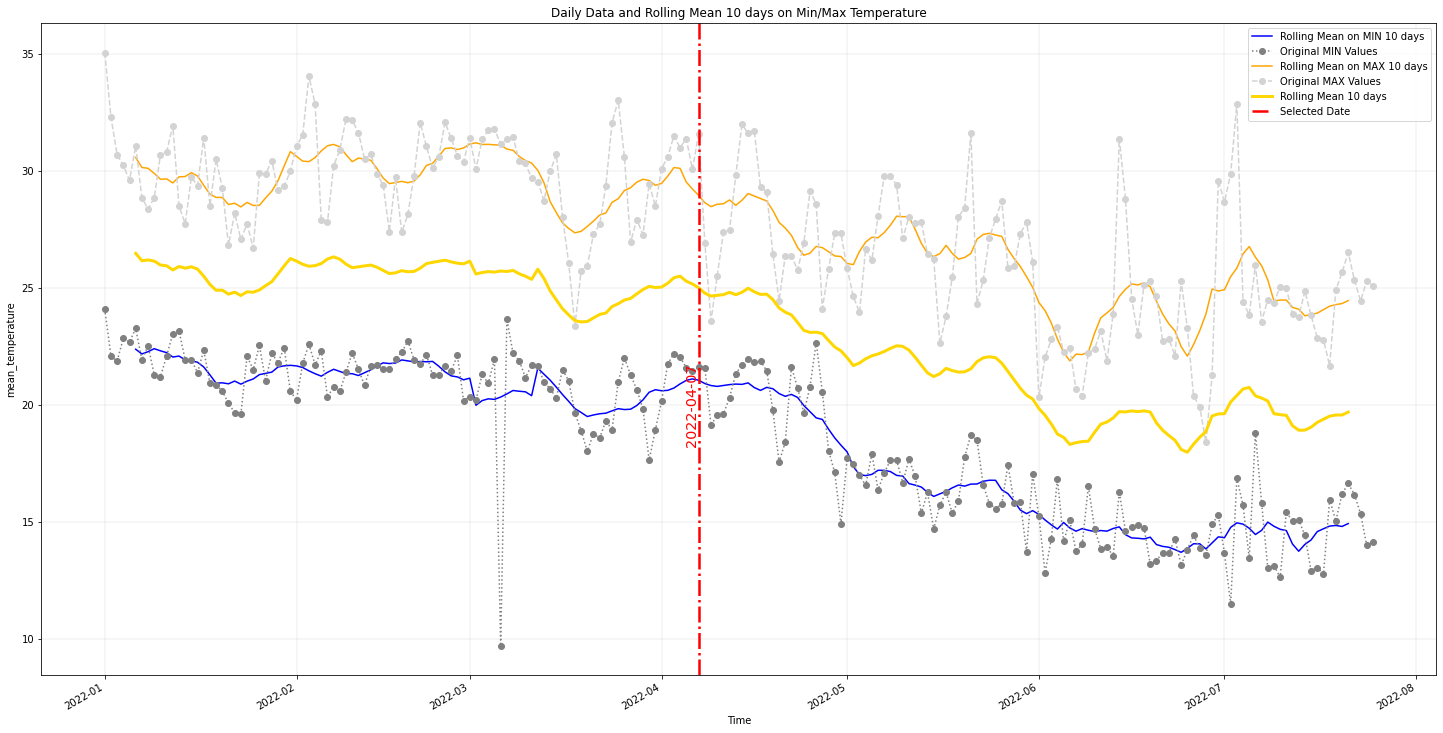

In [18]:
ds_max_min.tmin.sel(lat=lat,lon=lon, method='nearest').rolling(time=10, center=True).mean().dropna("time").plot(color="blue",figsize=(25,12), label='Rolling Mean on MIN 10 days')
ds_max_min.tmin.sel(lat=lat,lon=lon, method='nearest').plot(color="gray", linestyle='dotted',marker="o",label='Original MIN Values')
ds_max_min.tmax.sel(lat=lat,lon=lon, method='nearest').rolling(time=10, center=True).mean().dropna("time").plot(color="orange", label='Rolling Mean on MAX 10 days')
ds_max_min.tmax.sel(lat=lat,lon=lon, method='nearest').plot(color="lightgray", linestyle='dashed',marker="o",label='Original MAX Values')
ds_max_min['mean_temperature'].sel(lat=lat,lon=lon, method='nearest').rolling(time=10, center=True).mean().dropna("time").plot(color="gold", linewidth=3.0,label='Rolling Mean 10 days')

plt.axvline(datetime.strptime(start_date, '%Y-%m-%d'),label='Selected Date',linestyle='-.',linewidth=2.5,color="red")
plt.legend()
plt.text(datetime.strptime(start_date, '%Y-%m-%d'), 20, start_date , rotation=90, ha='right', va='center',size='x-large',c='red')
plt.grid(linestyle='-', linewidth=0.2)
plt.title('Daily Data and Rolling Mean 10 days on Min/Max Temperature');

## Check Data with Meteo Station

In [19]:
# Get weather stations ordered by distance to Clicked Point
stations = Stations()
stations = stations.nearby(lat, lon)
station = stations.fetch(1)
station

name country region    wmo  icao  latitude  longitude  elevation  \
id                                                                           
67295  Chimoio      MZ     MN  67295  FQCH  -19.1167    33.4667      731.0   

            timezone hourly_start hourly_end daily_start  daily_end  \
id                                                                    
67295  Africa/Maputo   1973-01-01 2022-07-28  1951-01-01 2022-07-19   

      monthly_start monthly_end       distance  
id                                              
67295    1951-01-01  2021-01-01  143514.897817

In [20]:
coords_1 = (lat, lon)

def distance_nearest_meteo_stations(df):
    coords_2 = (df.latitude,df.longitude)
    return geopy.distance.geodesic(coords_1, coords_2).km   

# # coords_2 = (station.latitude[0], station.longitude[0])
station['distance_km'] = station.apply(distance_nearest_meteo_stations,axis=1)
station

name country region    wmo  icao  latitude  longitude  elevation  \
id                                                                           
67295  Chimoio      MZ     MN  67295  FQCH  -19.1167    33.4667      731.0   

            timezone hourly_start hourly_end daily_start  daily_end  \
id                                                                    
67295  Africa/Maputo   1973-01-01 2022-07-28  1951-01-01 2022-07-19   

      monthly_start monthly_end       distance  distance_km  
id                                                           
67295    1951-01-01  2021-01-01  143514.897817   143.308168

In [21]:
# Get daily data for 2020 near the selected point 
data_station = Daily(station, start = datetime(2022, 1, 1), end = datetime(2022, 12, 31)) # Fetch Pandas DataFrame
data_station = data_station.fetch()
data_station

tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2022-01-01  24.4  20.8  30.0   NaN   NaN   98.0   8.8   NaN  1015.7   NaN
2022-01-02  24.6  21.0  29.6   NaN   NaN   53.0   6.9   NaN  1016.2   NaN
2022-01-03  22.8  18.2  27.8  23.9   NaN  150.0  10.6   NaN  1016.7   NaN
2022-01-04  24.2  20.0  28.7   NaN   NaN  143.0   8.5   NaN  1016.3   NaN
2022-01-05  24.5  22.0  29.0   NaN   NaN   97.0   8.3   NaN  1016.2   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2022-08-06  20.7  15.1  27.9   NaN   NaN   64.0   6.4   NaN     NaN   NaN
2022-08-07  19.8  14.8  26.4   NaN   NaN  108.0   7.8   NaN     NaN   NaN
2022-08-08  18.4  14.5  23.4   NaN   NaN  153.0  11.7   NaN     NaN   NaN
2022-08-09  18.0  14.2  23.6   NaN   NaN  153.0  11.6   NaN     NaN   NaN
2022-08-10  17.9  13.8  23.2   NaN   NaN  155.0   9.8   NaN     NaN   NaN

[222 rows x 10 columns]

In [22]:
data_noaa = ds_max_min.sel(lat=lat, lon=lon, method='nearest').to_dataframe()

In [23]:
data_noaa

lat    lon  spatial_ref       tmin       tmax  mean_temperature
time                                                                         
2022-01-01 -18.25  34.25            0  24.095348  35.057140         29.576244
2022-01-02 -18.25  34.25            0  22.072001  32.284470         27.178234
2022-01-03 -18.25  34.25            0  21.871668  30.691505         26.281586
2022-01-04 -18.25  34.25            0  22.836189  30.228409         26.532299
2022-01-05 -18.25  34.25            0  22.684166  29.593420         26.138794
...           ...    ...          ...        ...        ...               ...
2022-07-21 -18.25  34.25            0  16.635839  26.510811         21.573326
2022-07-22 -18.25  34.25            0  16.162428  25.332018         20.747223
2022-07-23 -18.25  34.25            0  15.343348  24.440994         19.892170
2022-07-24 -18.25  34.25            0  13.985904  25.296120         19.641012
2022-07-25 -18.25  34.25            0  14.126914  25.088911         19.607912

[206 rows x 6 columns]

In [24]:
data_compare = data_station.join(data_noaa, lsuffix='_station', rsuffix='_noaa')

In [25]:
data_compare

tavg  tmin_station  tmax_station  prcp  snow   wdir  wspd  wpgt  \
time                                                                          
2022-01-01  24.4          20.8          30.0   NaN   NaN   98.0   8.8   NaN   
2022-01-02  24.6          21.0          29.6   NaN   NaN   53.0   6.9   NaN   
2022-01-03  22.8          18.2          27.8  23.9   NaN  150.0  10.6   NaN   
2022-01-04  24.2          20.0          28.7   NaN   NaN  143.0   8.5   NaN   
2022-01-05  24.5          22.0          29.0   NaN   NaN   97.0   8.3   NaN   
...          ...           ...           ...   ...   ...    ...   ...   ...   
2022-08-06  20.7          15.1          27.9   NaN   NaN   64.0   6.4   NaN   
2022-08-07  19.8          14.8          26.4   NaN   NaN  108.0   7.8   NaN   
2022-08-08  18.4          14.5          23.4   NaN   NaN  153.0  11.7   NaN   
2022-08-09  18.0          14.2          23.6   NaN   NaN  153.0  11.6   NaN   
2022-08-10  17.9          13.8          23.2   NaN   NaN  155.0   9.8   NaN   

              pres  tsun    lat    lon  spatial_ref  tmin_noaa  tmax_noaa  \
time                                                                        
2022-01-01  1015.7   NaN -18.25  34.25          0.0  24.095348  35.057140   
2022-01-02  1016.2   NaN -18.25  34.25          0.0  22.072001  32.284470   
2022-01-03  1016.7   NaN -18.25  34.25          0.0  21.871668  30.691505   
2022-01-04  1016.3   NaN -18.25  34.25          0.0  22.836189  30.228409   
2022-01-05  1016.2   NaN -18.25  34.25          0.0  22.684166  29.593420   
...            ...   ...    ...    ...          ...        ...        ...   
2022-08-06     NaN   NaN    NaN    NaN          NaN        NaN        NaN   
2022-08-07     NaN   NaN    NaN    NaN          NaN        NaN        NaN   
2022-08-08     NaN   NaN    NaN    NaN          NaN        NaN        NaN   
2022-08-09     NaN   NaN    NaN    NaN          NaN        NaN        NaN   
2022-08-10     NaN   NaN    NaN    NaN          NaN        NaN        NaN   

            mean_temperature  
time                          
2022-01-01         29.576244  
2022-01-02         27.178234  
2022-01-03         26.281586  
2022-01-04         26.532299  
2022-01-05         26.138794  
...                      ...  
2022-08-06               NaN  
2022-08-07               NaN  
2022-08-08               NaN  
2022-08-09               NaN  
2022-08-10               NaN  

[222 rows x 16 columns]

In [26]:
table = pd.pivot_table(data_compare, values=['tavg', 'mean_temperature','tmin_station','tmin_noaa'], index=['time']) #, columns=['tmin_station'], aggfunc=np.sum)
table['diff_temp'] = table.mean_temperature - table.tavg
table.reset_index(inplace=True)
table.sample(4)

time  mean_temperature  tavg  tmin_noaa  tmin_station  diff_temp
160 2022-06-10         18.545435  15.4  14.707947          11.0   3.145435
83  2022-03-25         27.003426  26.1  20.983316          20.0   0.903426
201 2022-07-21         21.573326  18.4  16.635839          15.0   3.173326
176 2022-06-26         17.394392  14.4  14.411985          10.1   2.994392

In [27]:
table_long = table.melt(id_vars='time' , value_vars=['tavg','mean_temperature','tmin_station','tmin_noaa'])
# table_long.sample(4)

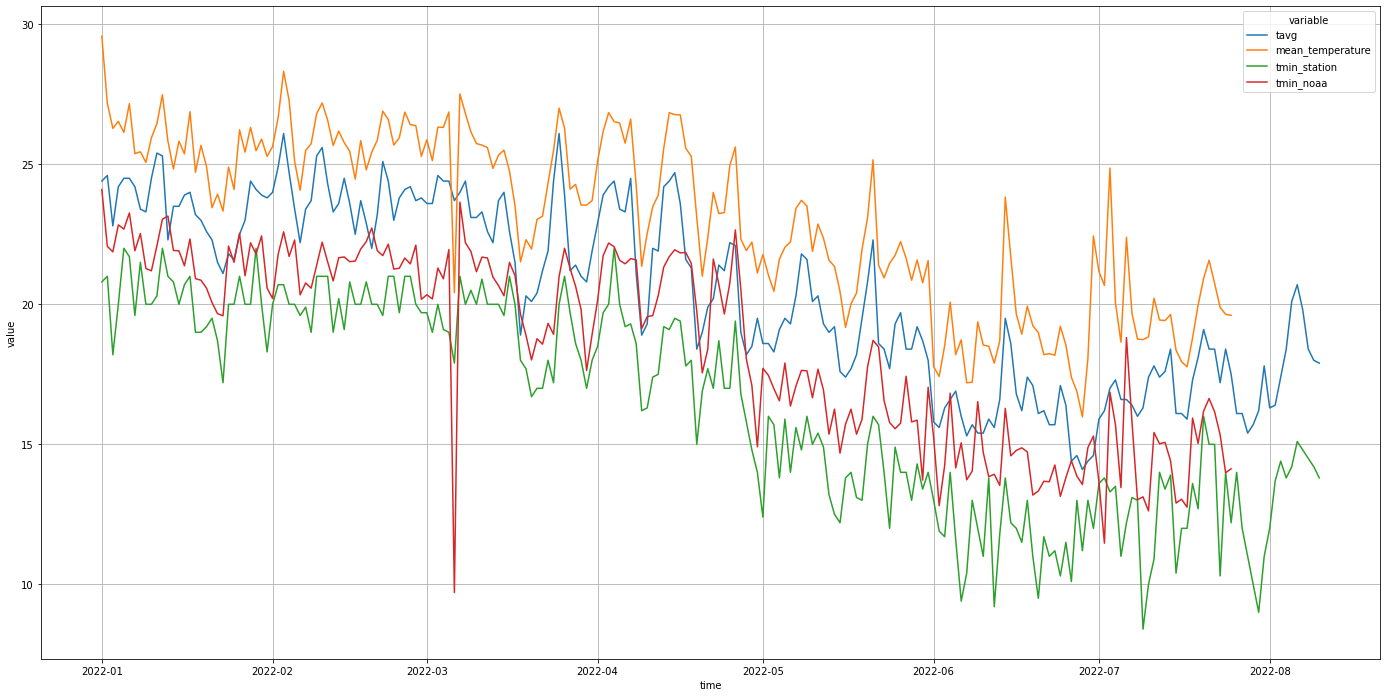

In [28]:
sns.lineplot(data=table_long,x='time',y='value',hue='variable')
plt.grid()

## Precipitation CHIRPS

<a id='precipitation'></a>

In [83]:
chirps_daily = 'final/clip_prec.nc'
ds_chirps_daily = xr.open_dataset(chirps_daily, chunks={"time": 10})
ds_chirps_daily

<xarray.Dataset>
Dimensions:      (latitude: 373, longitude: 377, time: 181)
Coordinates:
  * latitude     (latitude) float32 -26.83 -26.77 -26.73 ... -8.275 -8.225
  * longitude    (longitude) float32 22.02 22.07 22.12 ... 40.72 40.77 40.82
  * time         (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-06-30
Data variables:
    spatial_ref  int32 ...
    precip       (time, latitude, longitude) float32 dask.array<chunksize=(10, 373, 377), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-07-18
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day....
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [28]:
# chirps_dekad_2020 = 'data/eaf_prec_dek.nc'
# ds_prec_dekad_2020 = xr.open_dataset(chirps_dekad_2020, chunks={"time": 10})
# ds_prec_dekad_2020

In [31]:
ds_chirps_daily.precip.hvplot(groupby='time', cmap='Blues', projection=ccrs.PlateCarree(), widget_location='bottom')

Column
    [0] HoloViews(DynamicMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='time', options=OrderedDict([('2022-01-01 ...]), value=numpy.datetime64('2022-01-..., value_throttled=numpy.datetime64('2022-01-..., width=250)
        [2] HSpacer()

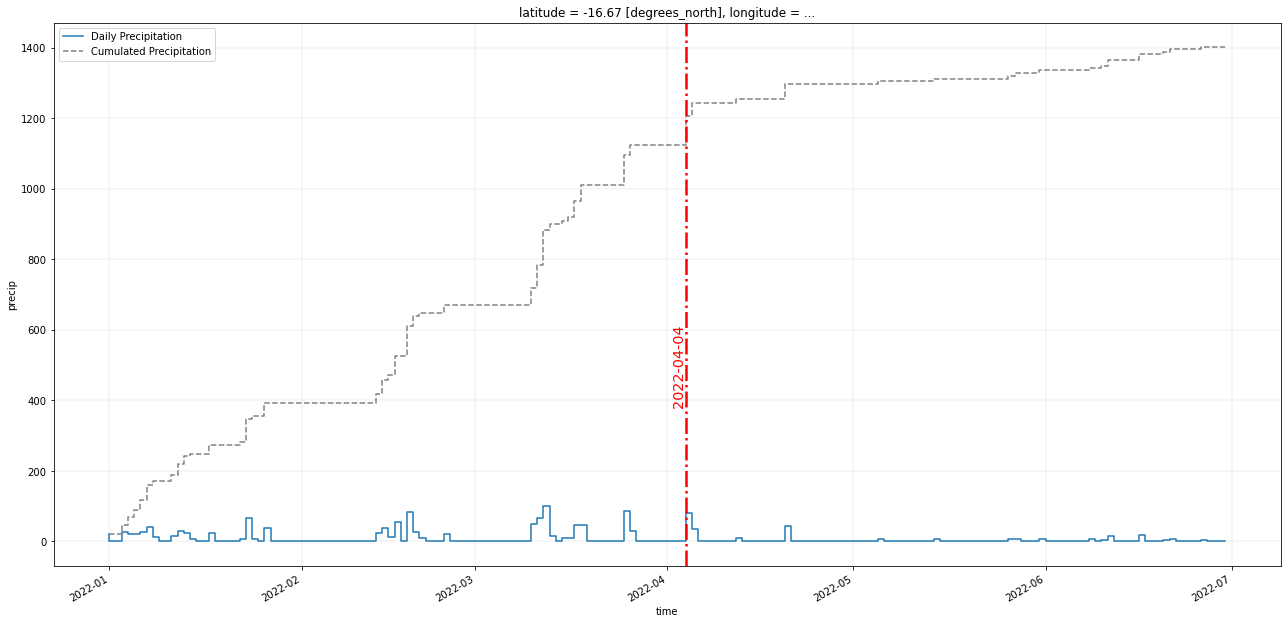

In [44]:
# ds_2021.sel(latitude=lat,longitude=lon, method='nearest').plot(figsize=(18,10))
ds_chirps_daily.precip.sel(latitude=lat, longitude=lon, method='nearest').plot.step(figsize=(22,10),label='Daily Precipitation');
ds_chirps_daily.precip.sel(latitude=lat, longitude=lon, method='nearest').cumsum().plot.step(c='gray',linestyle='--',label='Cumulated Precipitation');
plt.axvline(datetime.strptime(start_date, '%Y-%m-%d'),linestyle='-.',linewidth=2.5,color="red")
plt.text(datetime.strptime(start_date, '%Y-%m-%d'), 500, start_date , rotation=90, ha='right', va='center',size='x-large',c='red')
plt.grid(linestyle='-', linewidth=0.2)
plt.legend();

In [30]:
# # ds_2021.sel(latitude=lat,longitude=lon, method='nearest').plot(figsize=(18,10))
# ds_2020.precip.sel(latitude=lat, longitude=lon, method='nearest').cumsum().plot.step(figsize=(22,10), label='Cumulated Daily Precipitation');

# plt.axvline(datetime.strptime(fake_date, '%Y-%m-%d'),linestyle='-.', linewidth=2.5,color="red")
# plt.text(datetime.strptime(fake_date, '%Y-%m-%d'), 150, fake_date , rotation=90, ha='right', va='center',size='x-large',c='red')
# plt.legend(loc='upper left')

In [41]:
# ds_prec_dekad_2020.precip.sel(latitude=lat,longitude=lon, method='nearest').plot(figsize=(22,10),label='Dekadal Precipitation');
# plt.axvline(datetime.strptime(fake_date, '%Y-%m-%d'),linestyle='-.',linewidth=2.5,color="red")
# plt.text(datetime.strptime(fake_date, '%Y-%m-%d'), 25, fake_date , rotation=90, ha='right', va='center',size='x-large',c='red')
# plt.grid(linestyle='-', linewidth=0.2)
# plt.legend();

## Soil Moisture ESA Only until 2020
<a id='soilmoisture'></a>

In [57]:
soil_moisture_2020 = 'data/eaf_smoist.nc'
ds_soil_moisture_2020 = xr.open_dataset(soil_moisture_2020) #, chunks={"time": 10})
ds_soil_moisture_2020

<xarray.Dataset>
Dimensions:      (lat: 78, lon: 74, time: 366)
Coordinates:
  * lat          (lat) float64 14.62 14.38 14.12 13.88 ... -4.125 -4.375 -4.625
  * lon          (lon) float64 33.12 33.38 33.62 33.88 ... 50.88 51.12 51.38
  * time         (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    spatial_ref  int32 ...
    sm           (time, lat, lon) float32 ...

In [61]:
ds_soil_moisture_2020.sm.hvplot(groupby='time', cmap='copper',projection=ccrs.PlateCarree())

:DynamicMap   [time]
   :Image   [lon,lat]   (sm)

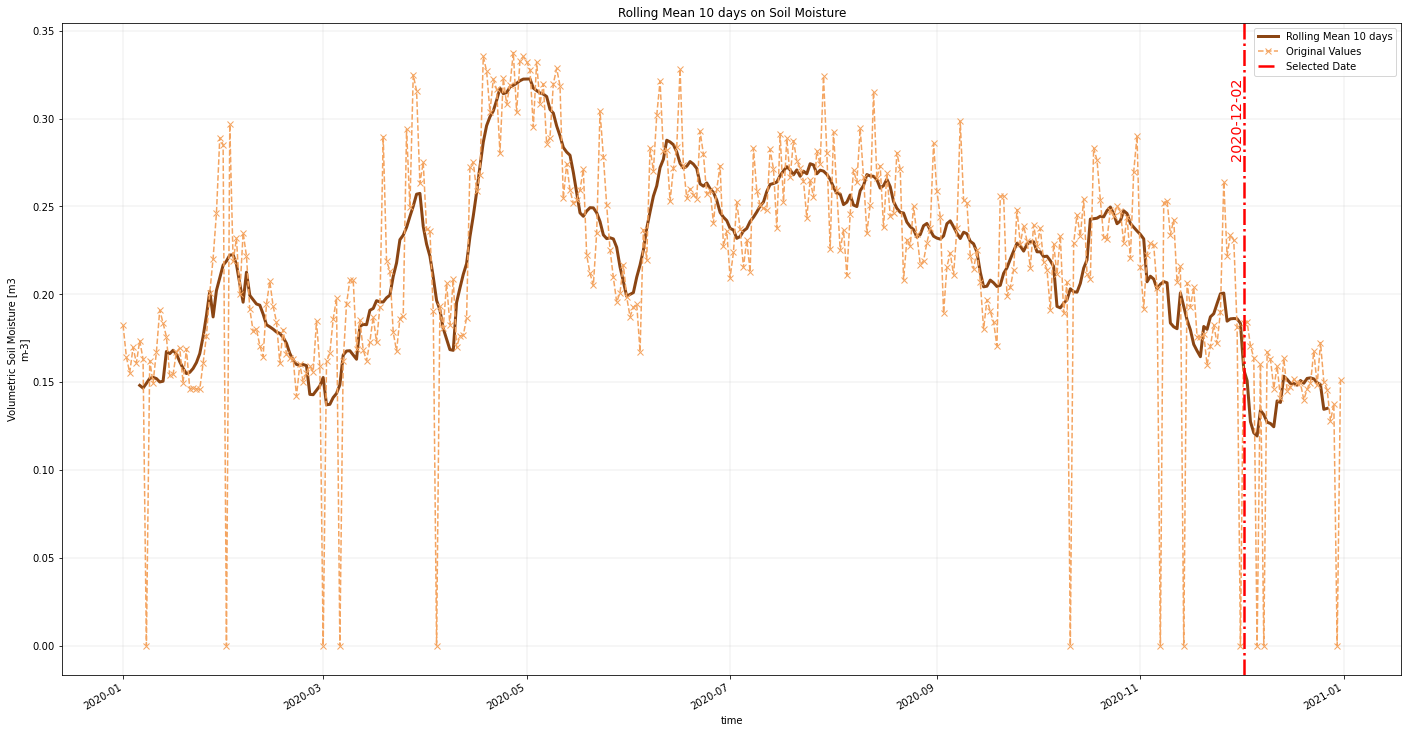

In [37]:
ds_soil_moisture_2020.sm.sel(lat=lat,lon=lon, method='nearest').rolling(time=10, center=True).mean().dropna("time").plot(color="saddlebrown",
                                                                                                                         figsize=(24,12),
                                                                                                                         linewidth=3.0,
                                                                                                                         label='Rolling Mean 10 days')

ds_soil_moisture_2020.sm.sel(lat=lat,lon=lon, method='nearest').plot(color="sandybrown", linestyle='dashed',marker="x",label='Original Values')
plt.axvline(datetime.strptime(fake_date, '%Y-%m-%d'),label='Selected Date',linestyle='-.',linewidth=2.5,color="red")
plt.text(datetime.strptime(fake_date, '%Y-%m-%d'), 0.3, fake_date , rotation=90, ha='right', va='center',size='x-large',c='red')
plt.legend()
plt.grid(linestyle='-', linewidth=0.2)
plt.title('Rolling Mean 10 days on Soil Moisture');

## Fraction of green Vegetation Cover Copernicus (10 Days)
<a id='fcover'></a>

In [30]:
fcover = 'final/fcover_clip.nc'
ds_fcover = xr.open_dataset(fcover, chunks={"time": 10})
ds_fcover

<xarray.Dataset>
Dimensions:     (time: 11, y: 9083, x: 8209)
Coordinates:
  * y           (y) float64 -2.482 -2.485 -2.488 -2.491 ... -29.51 -29.51 -29.51
  * x           (x) float64 21.4 21.4 21.4 21.4 ... 45.82 45.82 45.82 45.82
  * time        (time) datetime64[ns] 2022-04-10 2022-04-20 ... 2022-07-20
Data variables:
    fcover      (time, y, x) uint8 dask.array<chunksize=(10, 9083, 8209), meta=np.ndarray>
    fcover_val  (time, y, x) float64 dask.array<chunksize=(10, 9083, 8209), meta=np.ndarray>
Attributes: (12/28)
    transform:            [ 2.97619048e-03  0.00000000e+00  2.13943452e+01  0...
    crs:                  +init=epsg:4326
    res:                  [0.00297619 0.00297619]
    is_tiled:             1
    nodatavals:           255.0
    scales:               0.004
    ...                   ...
    region_name:          CUSTOM
    sensor:               OLCI
    source:               Derived from EO satellite imagery
    time_coverage_end:    2022-04-10T23:59:59Z
    time_coverage_start:  2021-09-12T00:00:00Z
    title:                10-daily Fraction of Vegetation Cover 333M: CUSTOM ...

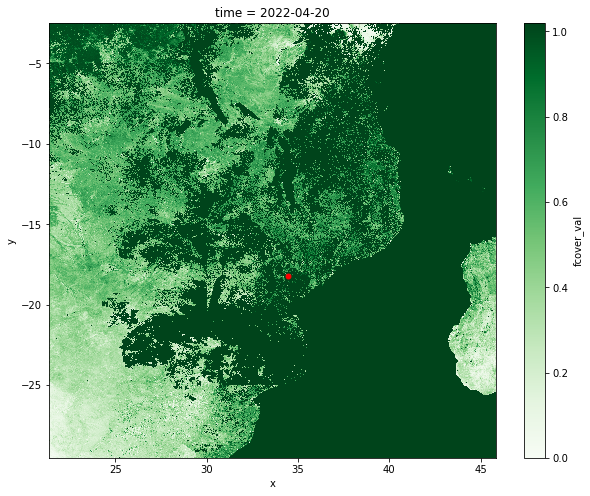

In [31]:
f, ax2 = plt.subplots(figsize=(10, 8))
ds_fcover_2020.fcover_val.isel(time=1).plot(cmap="Greens", ax=ax2)
ax2.scatter(x=lon, y=lat, color='red',s=24)
# ax2.set_title("FCover")
# ax2.set_axis_off()
plt.show()

In [96]:
# # ax.plot(ds_fcover_2020.fcover_val.sel(x=lon,y=lat, method='nearest'),label='% vegetated on 333 sqmt 10 days')
# ds_fcover.fcover_val.sel(x=lon,y=lat, method='nearest').plot(color="green", figsize=(24,12), linewidth=2.0, label='% vegetated on 333 sqmt 10 days')

# plt.xlim([date(2022, 4, 1), date(2022, 7, 31)])
# plt.grid(linestyle='--', linewidth=1.2)
# plt.axvline(datetime.strptime('2022-06-20T00:00:00.000000000', '%Y-%m-%d'), label='Selected Date', linestyle='-.', linewidth=2.5,color="red")
# plt.text(datetime.strptime('2022-06-20T00:00:00.000000000', '%Y-%m-%d'), 0.7, '2022-06-20T00:00:00.000000000' , rotation=90, ha='right', va='center',size='x-large', c='red')
# plt.legend()
# plt.title('FCOVER 10 days');

# Adding Environmental Conditions to Observations

In [40]:
available_dates = [key for key in df_grp_date.groups.keys()]
# available_dates

In [97]:
df_grp_date.groups.keys()

dict_keys(['2022-04-01', '2022-04-02', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-25', '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13', '2022-06-01', '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-08', '2022-06-09', '2022-06-15', '2022-06-16', '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30'])

In [42]:
df_grp_date.get_group('2022-04-01')

Unnamed: 0     country        lat        lon     id          sub_region  \
9           433  Mozambique -19.220543  33.963544  57564  Sub-Saharan Africa   
22          446  Mozambique -24.249006  32.852342  72077  Sub-Saharan Africa   
61          485  Mozambique -22.720097  31.881419  57665  Sub-Saharan Africa   
94          518  Mozambique -26.405225  32.647493  57643  Sub-Saharan Africa   
103         527  Mozambique -22.710001  31.844111  57668  Sub-Saharan Africa   
114         538  Mozambique -22.710001  31.844111  57667  Sub-Saharan Africa   
122         546  Mozambique -24.051912  32.720322  57681  Sub-Saharan Africa   
153         577  Mozambique -22.710001  31.844111  57669  Sub-Saharan Africa   
159         583  Mozambique -24.249006  32.852342  72078  Sub-Saharan Africa   
200         624  Mozambique -19.238792  34.032775  57553  Sub-Saharan Africa   
226         650  Mozambique -19.205275  33.960202  57547  Sub-Saharan Africa   
261         685  Mozambique -26.499496  32.575097  57619  Sub-Saharan Africa   
277         701  Mozambique -19.250268  33.923982  57559  Sub-Saharan Africa   
287         711  Mozambique -22.841173  31.977058  57666  Sub-Saharan Africa   
292         716  Mozambique -19.238792  34.032775  57565  Sub-Saharan Africa   

     region       village       district  number_scouting  \
9    Africa  Siluvo Jasse         Sofala                1   
22   Africa       Mpelane  Gaza Province                1   
61   Africa      Mapuvule           Gaza                1   
94   Africa     Missevene         Maputo                1   
103  Africa      Mapuvule           Gaza                1   
114  Africa      Mapuvule           Gaza                1   
122  Africa       Mpelane           Gaza                1   
153  Africa      Mapuvule           Gaza                1   
159  Africa       Mpelane  Gaza Province                1   
200  Africa  Siluvo Jasse         Sofala                1   
226  Africa  Siluvo Jasse         Sofala                1   
261  Africa   tinonganine         Maputo                1   
277  Africa  Siluvo Jasse         Manica                1   
287  Africa      Mapuvule           Gaza                1   
292  Africa  Siluvo Jasse         Sofala                1   

     scouting_plants_checked  scouting_plants_faw  hecatres_checked  \
9                         50                  0.0              0.50   
22                        50                 50.0              0.50   
61                        50                 44.0              0.17   
94                        50                 12.0              0.08   
103                       50                 50.0              0.28   
114                       50                 46.0              0.17   
122                       50                 39.0              1.00   
153                       50                 30.0              0.40   
159                       50                 42.0              1.20   
200                       50                  0.0              0.50   
226                       50                  0.0              3.00   
261                       50                 37.0              0.24   
277                       50                  0.0              0.50   
287                       50                 44.0              1.00   
292                       50                  0.0              0.50   

           date  perc_numeric  presence                    geometry  
9    2022-04-01          0.00         0  POINT (33.96354 -19.22054)  
22   2022-04-01          1.00         1  POINT (32.85234 -24.24901)  
61   2022-04-01          0.88         1  POINT (31.88142 -22.72010)  
94   2022-04-01          0.24         1  POINT (32.64749 -26.40523)  
103  2022-04-01          1.00         1  POINT (31.84411 -22.71000)  
114  2022-04-01          0.92         1  POINT (31.84411 -22.71000)  
122  2022-04-01          0.78         1  POINT (32.72032 -24.05191)  
153  2022-04-01          0.60         1  POINT (31

In [98]:
group_date = wgts.Dropdown(
    description='Group Date',
    options=available_dates,
    value= available_dates[0]        
)

def data_by_date(value):
    if value is None:
        value = group_date[0]
    global daily_group
    daily_group = df_grp_date[['id','date','country','lat','lon','presence']].get_group(value)    
    return daily_group
wgts.interact(data_by_date, value = group_date)

interactive(children=(Dropdown(description='Group Date', options=('2022-04-01', '2022-04-02', '2022-04-04', '2…

<function __main__.data_by_date(value)>

In [99]:
last_day_period = datetime.strptime(daily_group.date.unique()[0], '%Y-%m-%d')

In [100]:
last_day_period

datetime.datetime(2022, 4, 1, 0, 0)

In [101]:
# Limiting values from the preceding 10 Days before the day of report
first_day_period = (last_day_period - timedelta(days=10))
first_day_period,last_day_period

(datetime.datetime(2022, 3, 22, 0, 0), datetime.datetime(2022, 4, 1, 0, 0))

## Adding Measurements Points

In [102]:
daily_group.set_index("id", inplace=True)

In [103]:
x_indexer = xr.DataArray(daily_group.lat, dims=["id"])
y_indexer = xr.DataArray(daily_group.lon, dims=["id"])

In [104]:
x_indexer

<xarray.DataArray 'lat' (id: 15)>
array([-19.220543, -24.249006, -22.720097, -26.405225, -22.710001,
       -22.710001, -24.051912, -22.710001, -24.249006, -19.238792,
       -19.205275, -26.499496, -19.250268, -22.841173, -19.238792])
Coordinates:
  * id       (id) int64 57564 72077 57665 57643 ... 57619 57559 57666 57565

In [105]:
y_indexer

<xarray.DataArray 'lon' (id: 15)>
array([33.963544, 32.852342, 31.881419, 32.647493, 31.844111, 31.844111,
       32.720322, 31.844111, 32.852342, 34.032775, 33.960202, 32.575097,
       33.923982, 31.977058, 34.032775])
Coordinates:
  * id       (id) int64 57564 72077 57665 57643 ... 57619 57559 57666 57565

### Daily Datasets

In [111]:
ds_daily_sliced_period_analysis = ds_max_min.sel(time=slice(first_day_period,last_day_period))

In [112]:
ds_daily_sliced_period_analysis

<xarray.Dataset>
Dimensions:           (lat: 38, lon: 38, time: 11)
Coordinates:
  * lat               (lat) float32 -8.25 -8.75 -9.25 ... -25.75 -26.25 -26.75
  * lon               (lon) float32 22.25 22.75 23.25 ... 39.75 40.25 40.75
  * time              (time) datetime64[ns] 2022-03-22 2022-03-23 ... 2022-04-01
Data variables:
    spatial_ref       int32 0
    tmin              (time, lat, lon) float32 dask.array<chunksize=(10, 38, 38), meta=np.ndarray>
    tmax              (time, lat, lon) float32 dask.array<chunksize=(10, 38, 38), meta=np.ndarray>
    mean_temperature  (time, lat, lon) float32 dask.array<chunksize=(10, 38, 38), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    version:        V1.0
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    history:        Updated 2022-07-26 15:42:18

In [113]:
ds_daily_sliced_period_analysis.time

<xarray.DataArray 'time' (time: 11)>
array(['2022-03-22T00:00:00.000000000', '2022-03-23T00:00:00.000000000',
       '2022-03-24T00:00:00.000000000', '2022-03-25T00:00:00.000000000',
       '2022-03-26T00:00:00.000000000', '2022-03-27T00:00:00.000000000',
       '2022-03-28T00:00:00.000000000', '2022-03-29T00:00:00.000000000',
       '2022-03-30T00:00:00.000000000', '2022-03-31T00:00:00.000000000',
       '2022-04-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-03-22 2022-03-23 ... 2022-04-01
Attributes:
    long_name:           Time
    delta_t:             0000-00-01 00:00:00
    avg_period:          0000-00-01 00:00:00
    axis:                T
    standard_name:       time
    coordinate_defines:  start
    actual_range:        [1069440. 1074360.]

In [114]:
ds_pnt_daily = ds_daily_sliced_period_analysis[['time','tmin','tmax','mean_temperature']].sel(lat=x_indexer, lon=y_indexer, method="nearest").to_dataframe()
# ds_pnt_daily = ds_sliced_period_analysis.sel(latitude=x_indexer, longitude=y_indexer, method="nearest")

In [115]:
ds_pnt_daily

tmin       tmax  mean_temperature    lat    lon
time       id                                                         
2022-03-22 57564  17.644915  27.290333         22.467625 -19.25  33.75
           72077  18.441565  29.248215         23.844891 -24.25  32.75
           57665  17.298044  30.146450         23.722248 -22.75  31.75
           57643  19.208136  28.700821         23.954479 -26.25  32.75
           57668  17.298044  30.146450         23.722248 -22.75  31.75
...                     ...        ...               ...    ...    ...
2022-04-01 57547  19.103930  30.217066         24.660498 -19.25  33.75
           57619  22.143463  30.759512         26.451488 -26.25  32.75
           57559  19.103930  30.217066         24.660498 -19.25  33.75
           57666  15.542545  32.976643         24.259594 -22.75  31.75
           57565  21.540112  31.286680         26.413395 -19.25  34.25

[165 rows x 5 columns]

In [116]:
ds_pnt_daily_reset = ds_pnt_daily.reset_index()
# ds_pnt_daily_reset['Country'] = ds_pnt_daily_reset['id'].str[:3]
ds_pnt_daily_reset

time     id       tmin       tmax  mean_temperature    lat    lon
0   2022-03-22  57564  17.644915  27.290333         22.467625 -19.25  33.75
1   2022-03-22  72077  18.441565  29.248215         23.844891 -24.25  32.75
2   2022-03-22  57665  17.298044  30.146450         23.722248 -22.75  31.75
3   2022-03-22  57643  19.208136  28.700821         23.954479 -26.25  32.75
4   2022-03-22  57668  17.298044  30.146450         23.722248 -22.75  31.75
..         ...    ...        ...        ...               ...    ...    ...
160 2022-04-01  57547  19.103930  30.217066         24.660498 -19.25  33.75
161 2022-04-01  57619  22.143463  30.759512         26.451488 -26.25  32.75
162 2022-04-01  57559  19.103930  30.217066         24.660498 -19.25  33.75
163 2022-04-01  57666  15.542545  32.976643         24.259594 -22.75  31.75
164 2022-04-01  57565  21.540112  31.286680         26.413395 -19.25  34.25

[165 rows x 7 columns]

In [117]:
single_pnt_values = ds_pnt_daily_reset[ds_pnt_daily_reset["id"]==ds_pnt_daily_reset.sample()['id'].values[0]]
single_pnt_values

time     id       tmin       tmax  mean_temperature    lat    lon
11  2022-03-22  57619  19.208136  28.700821         23.954479 -26.25  32.75
26  2022-03-23  57619  19.981400  29.871075         24.926237 -26.25  32.75
41  2022-03-24  57619  20.242794  37.511436         28.877115 -26.25  32.75
56  2022-03-25  57619  22.704103  31.740732         27.222418 -26.25  32.75
71  2022-03-26  57619  22.297073  27.113359         24.705215 -26.25  32.75
86  2022-03-27  57619  21.791979  31.625559         26.708769 -26.25  32.75
101 2022-03-28  57619  21.461081  28.176073         24.818577 -26.25  32.75
116 2022-03-29  57619  20.437738  30.068871         25.253304 -26.25  32.75
131 2022-03-30  57619  19.463810  30.899380         25.181595 -26.25  32.75
146 2022-03-31  57619  19.253977  30.883459         25.068718 -26.25  32.75
161 2022-04-01  57619  22.143463  30.759512         26.451488 -26.25  32.75

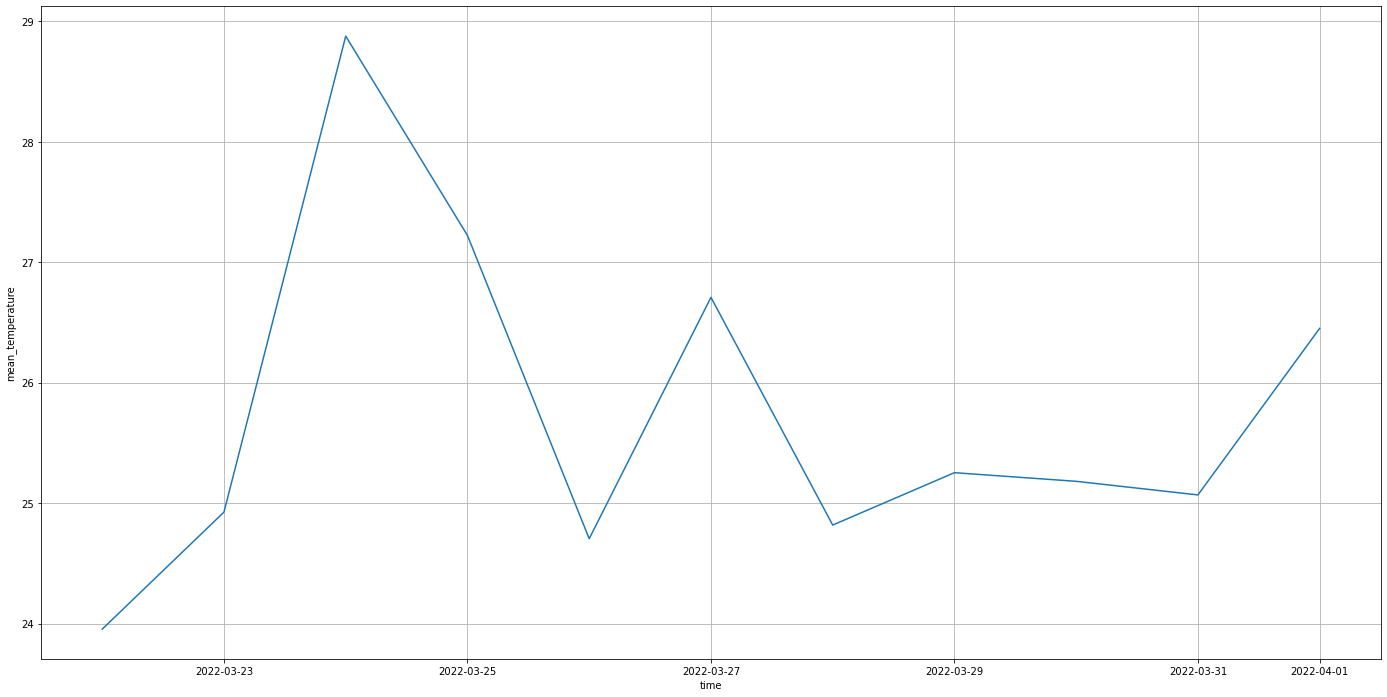

In [118]:
sns.lineplot(data=single_pnt_values, x="time", y="mean_temperature")
plt.grid()

In [120]:
pnt_values_wide = single_pnt_values.pivot("time", "id")[['tmin','tmax','mean_temperature']]
pnt_values_wide.head()

tmin       tmax mean_temperature
id              57619      57619            57619
time                                             
2022-03-22  19.208136  28.700821        23.954479
2022-03-23  19.981400  29.871075        24.926237
2022-03-24  20.242794  37.511436        28.877115
2022-03-25  22.704103  31.740732        27.222418
2022-03-26  22.297073  27.113359        24.705215

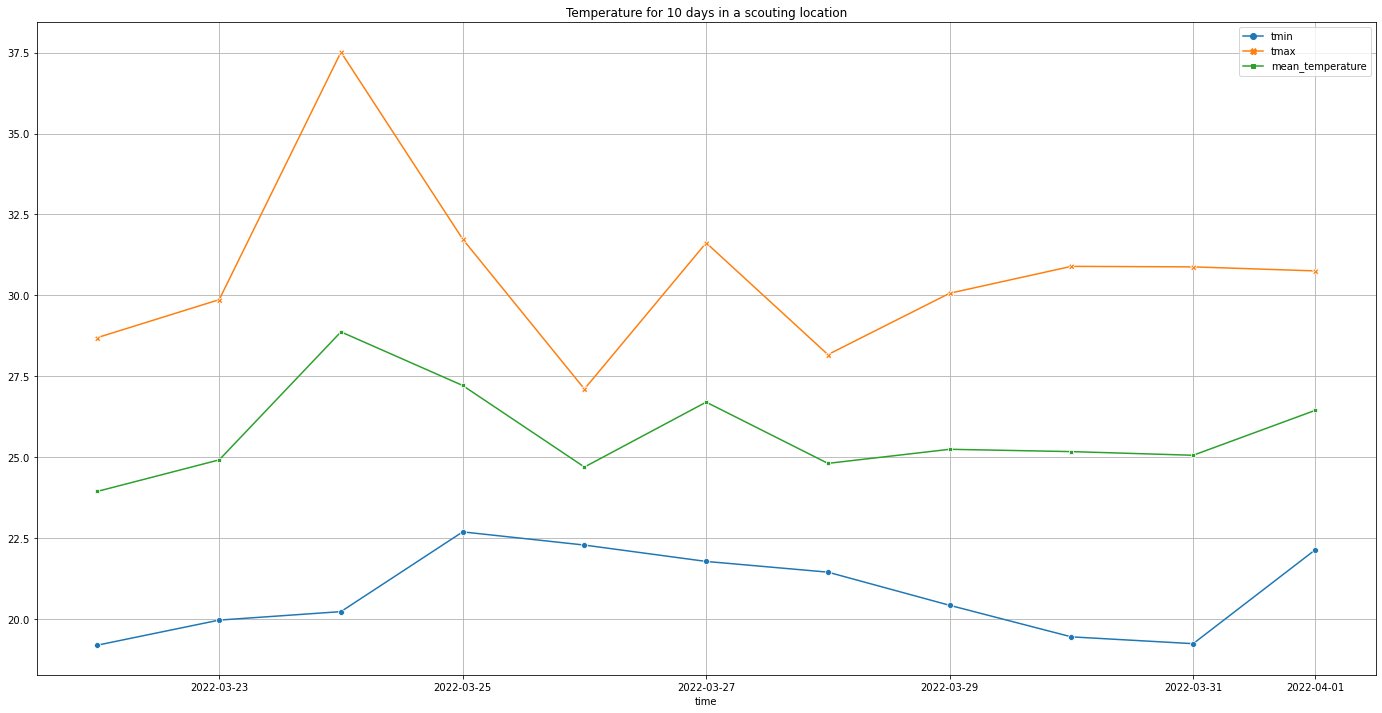

In [122]:
sns.lineplot(data=pnt_values_wide, markers=True, dashes=False).set(title=single_pnt_values.id.unique()[0])
plt.title("Temperature for 10 days in a scouting location")
plt.grid();

### Dekadal Analysis

In [77]:
ds_dekadal_sliced_period_analysis = ds_fcover.sel(time=slice(first_day_period,last_day_period))

In [78]:
ds_dekadal_sliced_period_analysis

<xarray.Dataset>
Dimensions:     (time: 0, y: 9083, x: 8209)
Coordinates:
  * y           (y) float64 -2.482 -2.485 -2.488 -2.491 ... -29.51 -29.51 -29.51
  * x           (x) float64 21.4 21.4 21.4 21.4 ... 45.82 45.82 45.82 45.82
  * time        (time) datetime64[ns] 
Data variables:
    fcover      (time, y, x) uint8 dask.array<chunksize=(0, 9083, 8209), meta=np.ndarray>
    fcover_val  (time, y, x) float64 dask.array<chunksize=(0, 9083, 8209), meta=np.ndarray>
Attributes: (12/28)
    transform:            [ 2.97619048e-03  0.00000000e+00  2.13943452e+01  0...
    crs:                  +init=epsg:4326
    res:                  [0.00297619 0.00297619]
    is_tiled:             1
    nodatavals:           255.0
    scales:               0.004
    ...                   ...
    region_name:          CUSTOM
    sensor:               OLCI
    source:               Derived from EO satellite imagery
    time_coverage_end:    2022-04-10T23:59:59Z
    time_coverage_start:  2021-09-12T00:00:00Z
    title:                10-daily Fraction of Vegetation Cover 333M: CUSTOM ...

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

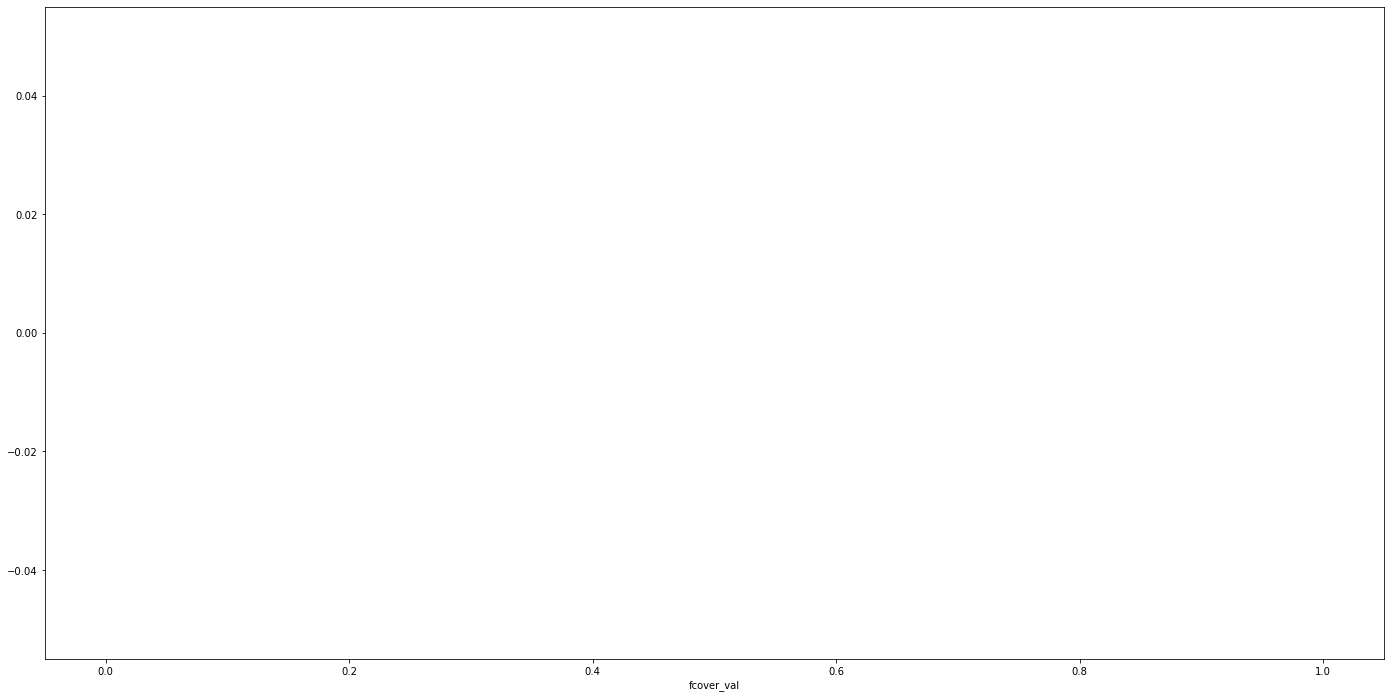

In [79]:
ds_dekadal_sliced_period_analysis.fcover_val.plot()

In [205]:
# x_indexer[0],y_indexer[0]
# ds_dekadal_sliced_period_analysis['fcover_val'].sel(x=y_indexer[0], y=x_indexer[0], method="nearest").to_dataframe()

In [85]:
ds_dekadal_sliced_period_analysis.time

<xarray.DataArray 'time' (time: 0)>
array([], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns]

In [86]:
ds_pnt_dekadal = ds_dekadal_sliced_period_analysis['fcover_val'].sel(x=y_indexer, y=x_indexer, method="nearest").to_dataframe()

## 10 Days Mean of daily values so that all values are based on a 10 days window

In [88]:
ds_pnt_daily_reset

time     id       tmin       tmax  mean_temperature    lat    lon
0   2022-03-22  57564  17.644915  27.290333         22.467625 -19.25  33.75
1   2022-03-22  72077  18.441565  29.248215         23.844891 -24.25  32.75
2   2022-03-22  57665  17.298044  30.146450         23.722248 -22.75  31.75
3   2022-03-22  57643  19.208136  28.700821         23.954479 -26.25  32.75
4   2022-03-22  57668  17.298044  30.146450         23.722248 -22.75  31.75
..         ...    ...        ...        ...               ...    ...    ...
160 2022-04-01  57547  19.103930  30.217066         24.660498 -19.25  33.75
161 2022-04-01  57619  22.143463  30.759512         26.451488 -26.25  32.75
162 2022-04-01  57559  19.103930  30.217066         24.660498 -19.25  33.75
163 2022-04-01  57666  15.542545  32.976643         24.259594 -22.75  31.75
164 2022-04-01  57565  21.540112  31.286680         26.413395 -19.25  34.25

[165 rows x 7 columns]

In [89]:
mean_pnts = ds_pnt_daily_reset.groupby(by='id').mean()[['tmin','tmax','mean_temperature']]
# mean_pnts['Country'] = mean_pnts.index.str[:3]
mean_pnts

tmin       tmax  mean_temperature
id                                           
57547  19.194624  29.241350         24.217987
57553  21.717232  30.656034         26.186632
57559  19.194624  29.241350         24.217987
57564  19.194624  29.241350         24.217987
57565  21.717232  30.656034         26.186632
57619  20.816868  30.668207         25.742538
57643  20.816868  30.668207         25.742538
57665  18.170338  31.587866         24.879103
57666  18.170338  31.587866         24.879103
57667  18.170338  31.587866         24.879103
57668  18.170338  31.587866         24.879103
57669  18.170338  31.587866         24.879103
57681  20.318214  32.053764         26.185989
72077  20.318214  32.053764         26.185989
72078  20.318214  32.053764         26.185989

## Cycling on daily groups

In [124]:
engine = db.create_engine('postgresql+psycopg2://postgres@localhost:5432/ml_faw')
con = engine.connect()
metadata = db.MetaData()
metadata

MetaData()

In [179]:
def enrich_daily_group(ds, final_date_str, grp, tbl_name):
    
    final_date = datetime.strptime(final_date_str, '%Y-%m-%d')
    
    initial_date = (final_date - timedelta(days=10))    
    
    ds_analysis = ds.sel(time=slice(initial_date,final_date))
    
    grp.set_index("id", inplace=True)
    
    x_indexer = xr.DataArray(grp.lat, dims=["id"])
    y_indexer = xr.DataArray(grp.lon, dims=["id"])
        
#     ds_pnt = ds_analysis.sel(latitude=x_indexer, longitude=y_indexer, method="nearest")
#     ds_pnt = ds_analysis.sel(lat=x_indexer, lon=y_indexer, method="nearest")
    ds_pnt = ds_analysis.sel(x=y_indexer, y=x_indexer, method="nearest")
    
#     spatial_df_enriched = ds_pnt['precip'].to_dataframe()
#     spatial_df_enriched['precip'].groupby(by='id').mean().to_sql(tbl_name, con, if_exists='append')    
    
#     spatial_df_enriched = ds_pnt[['time','tmin','tmax','mean_temperature']].to_dataframe()
#     spatial_df_enriched_reset = spatial_df_enriched.reset_index()    
#     spatial_df_enriched[['tmin','tmax','mean_temperature']].groupby(by='id').mean().to_sql(tbl_name, con, if_exists='append')    

    spatial_df_enriched = ds_pnt['fcover_val'].to_dataframe()
    spatial_df_enriched['fcover_val'].groupby(by='id').mean().to_sql(tbl_name, con, if_exists='append')

    # spatial_df_enriched = ds_pnt['sm'].to_dataframe()
    # spatial_df_enriched['sm'].groupby(by='id').mean().to_sql(tbl_name, con, if_exists='append')
    
    print(f"inserted {final_date}")

In [180]:
daily_label

'2022-06-30'

In [181]:
# ds_chirps_daily
# ds_max_min
ds_fcover

<xarray.Dataset>
Dimensions:     (time: 11, y: 9083, x: 8209)
Coordinates:
  * y           (y) float64 -2.482 -2.485 -2.488 -2.491 ... -29.51 -29.51 -29.51
  * x           (x) float64 21.4 21.4 21.4 21.4 ... 45.82 45.82 45.82 45.82
  * time        (time) datetime64[ns] 2022-04-10 2022-04-20 ... 2022-07-20
Data variables:
    fcover      (time, y, x) uint8 dask.array<chunksize=(10, 9083, 8209), meta=np.ndarray>
    fcover_val  (time, y, x) float64 dask.array<chunksize=(10, 9083, 8209), meta=np.ndarray>
Attributes: (12/28)
    transform:            [ 2.97619048e-03  0.00000000e+00  2.13943452e+01  0...
    crs:                  +init=epsg:4326
    res:                  [0.00297619 0.00297619]
    is_tiled:             1
    nodatavals:           255.0
    scales:               0.004
    ...                   ...
    region_name:          CUSTOM
    sensor:               OLCI
    source:               Derived from EO satellite imagery
    time_coverage_end:    2022-04-10T23:59:59Z
    time_coverage_start:  2021-09-12T00:00:00Z
    title:                10-daily Fraction of Vegetation Cover 333M: CUSTOM ...

In [182]:
# daily_values

In [184]:
for daily_label,daily_values in df_grp_date:
#     enrich_daily_group(ds_chirps_daily,daily_label,daily_values,tbl_name='precipitation')
#     enrich_daily_group(ds_max_min,daily_label,daily_values,tbl_name='temperatures')
    # enrich_daily_group(ds_soil_moisture_2020,daily_label,daily_values,tbl_name='soil_moisture')
    enrich_daily_group(ds_fcover, daily_label, daily_values, tbl_name='fcover')
    pass

inserted 2022-04-01 00:00:00
inserted 2022-04-02 00:00:00
inserted 2022-04-04 00:00:00
inserted 2022-04-05 00:00:00
inserted 2022-04-06 00:00:00
inserted 2022-04-07 00:00:00
inserted 2022-04-08 00:00:00
inserted 2022-04-09 00:00:00
inserted 2022-04-10 00:00:00
inserted 2022-04-11 00:00:00
inserted 2022-04-12 00:00:00
inserted 2022-04-13 00:00:00
inserted 2022-04-16 00:00:00
inserted 2022-04-17 00:00:00
inserted 2022-04-18 00:00:00
inserted 2022-04-25 00:00:00
inserted 2022-05-10 00:00:00
inserted 2022-05-11 00:00:00
inserted 2022-05-12 00:00:00
inserted 2022-05-13 00:00:00
inserted 2022-06-01 00:00:00
inserted 2022-06-03 00:00:00
inserted 2022-06-04 00:00:00
inserted 2022-06-05 00:00:00
inserted 2022-06-06 00:00:00
inserted 2022-06-08 00:00:00
inserted 2022-06-09 00:00:00
inserted 2022-06-15 00:00:00
inserted 2022-06-16 00:00:00
inserted 2022-06-19 00:00:00
inserted 2022-06-20 00:00:00
inserted 2022-06-21 00:00:00
inserted 2022-06-22 00:00:00
inserted 2022-06-23 00:00:00
inserted 2022-